# Bibliotecas

In [1]:
#
import pandas as pd
import numpy as np
# Analise de Dados Missing
import missingno as msno
# Visualização dos Dados
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn
from sklearn.preprocessing import Normalizer
## Modelos
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
## Metricas de avaliação
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
## Preenchendo os dados nulos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

# Data Frame

<h3>Renda</h3>   
<p>É o valor em reais da renda do cliente</p>
<h3>Compras</h3> 
<p>É o valor em compras no seu estabelecimento</p>
<h3>Idade</h3>   
<p>É a idade do cliente</p>
<h3>Scrcdt</h3>  
<p>É o score de crédito no mercado (parecido com o serasa). O score vai de 0 a 1000. Quanto maior, mais crédito no mercado a pessoa tem.</p>
<h3>Sexo</h3>    
<p>1= masculino/ 0 = feminino</p>

---

In [2]:
#Importando o DataFrame
df_raw = pd.read_csv('../1_bases_originais/empresa2.csv', sep=';')
df_raw.head(20) # Mostrando os 20 primeiros registros

renda      compras  idade  scrcrdt  sexo
0   5441.818466  4371.210233   41.0    392.0   0.0
1   6033.031579  5113.741635   41.0    392.0   0.0
2   6117.688314  5090.215046   41.0    392.0   0.0
3   5224.961569  4402.706456    NaN    392.0   0.0
4   5445.808442  4338.889662   41.0    392.0   0.0
5   5805.420660  4718.372918   41.0    392.0   0.0
6   6133.122755  4926.712098   41.0    392.0   0.0
7   5536.617748  4668.629839   41.0    392.0   NaN
8   5363.822910  4566.722736   41.0    392.0   0.0
9   6466.745833  5662.061170    NaN    392.0   0.0
10  5996.594499  4876.899017   41.0    392.0   0.0
11  5994.093525          NaN   41.0    392.0   0.0
12  5715.230887  4680.819329   41.0    392.0   0.0
13          NaN  4748.244534    NaN    392.0   0.0
14  5520.758277  4545.574662   41.0    392.0   0.0
15          NaN  4031.324017    NaN    392.0   0.0
16  5910.499949  4789.593732   41.0    392.0   NaN
17  5472.745319  4595.499299   41.0    392.0   0.0
18  5281.234024          NaN   41.0    392.0   0.0
19  5529.913267  4518.102479   41.0    392.0   0.0

In [3]:
print(f'Temos {df_raw.shape[0]} registros e {df_raw.shape[1]} colunas')

Temos 63918 registros e 5 colunas


## Tratando o DF

### Analise de Dados Nulos

In [4]:
df_raw.isnull().sum() # Somando os dados nulos de todas as colunas

renda      6433
compras    6290
idade      6370
scrcrdt    6406
sexo       6460
dtype: int64

* Há dados faltantes

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

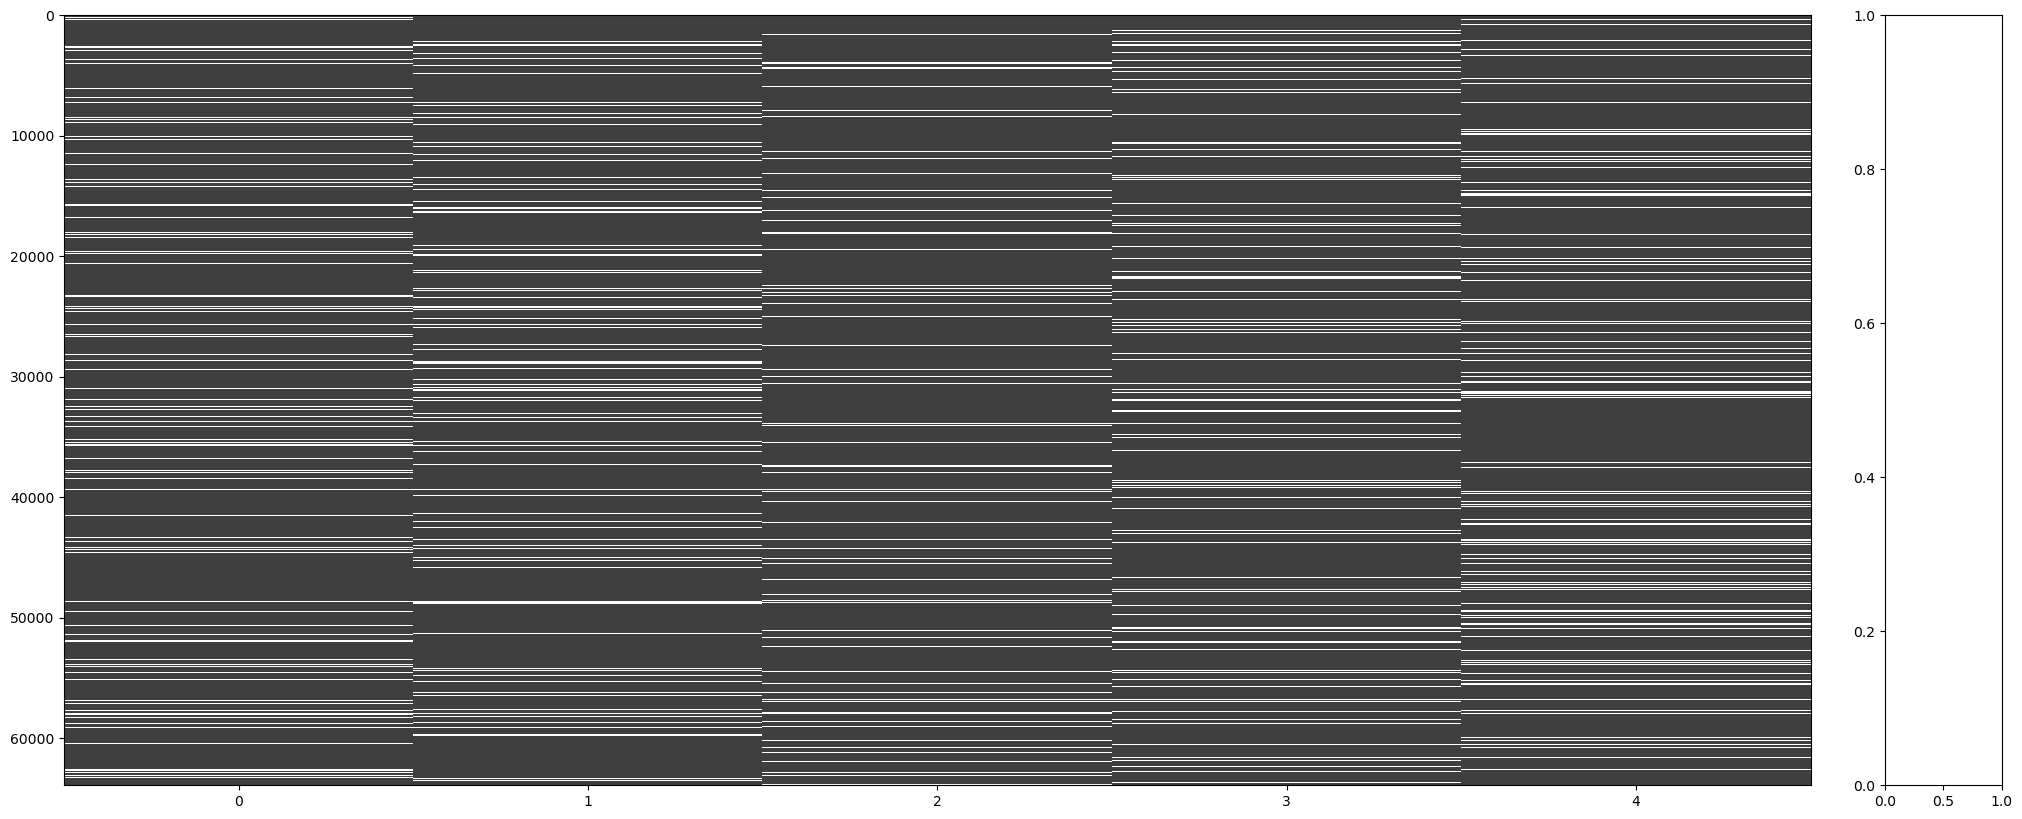

In [5]:
msno.matrix(df_raw) # Plotando Grafico para analise de padrões dos dados faltantes

In [6]:
# Gerando os dados 
dados_nulos = []
dados_nulos_p = []
for col in list(df_raw.columns):
    count_null = df_raw[col].isnull().sum() # Quantidade de dados nulos
    dados_nulos.append(count_null)  
    count_null_p = str((count_null * 100 / len(df_raw)).round(2)) + '%' # Transformando os valores obtidor em porcentagem
    dados_nulos_p.append(count_null_p)

# Criando DF para analise com os dados gerados
df_tab = pd.DataFrame({'Dados Faltantes': dados_nulos # Coluna com o total de dados faltantes
                        ,'(%)': dados_nulos_p}) # Representação em porcentagem dos valroes

df_tab.rename(index = {0: df_raw.columns[0]       # Renomeando os index com o nome das colunas
                        , 1 :df_raw.columns[1] 
                        , 2 :df_raw.columns[2]
                        , 3 :df_raw.columns[3]
                        , 4 :df_raw.columns[4]} , inplace=True)

df_tab.rename_axis('Colunas', axis=1, inplace=True) # Renomeando a coluna dos index
df_tab

Colunas  Dados Faltantes     (%)
renda               6433  10.06%
compras             6290   9.84%
idade               6370   9.97%
scrcrdt             6406  10.02%
sexo                6460  10.11%

In [7]:
print(f'O total de registros com algum valor nulo é de {len(df_raw[df_raw.isnull().any(axis=1)])} registros. E isso representa {round(26178*100/len(df_raw),2)}% de todos os nossos registros.')

O total de registros com algum valor nulo é de 26178 registros. E isso representa 40.96% de todos os nossos registros.


<h3> Analise </h3>
<p>Os dados nulos não possuem padrões, sendo os dados faltantes completamente ao acaso</p>
<p>Como temos um numero alto de registros com valores nulos, iremos preencher esses valor com a predição do modelo de classificação/regressão.</p>

#### Tratamento

In [8]:
# Separando todos os registros com algum valor nulo
df_nulos = df_raw[df_raw.isnull().any(axis=1)].copy()
df_nulos.head()

renda      compras  idade  scrcrdt  sexo
3   5224.961569  4402.706456    NaN    392.0   0.0
7   5536.617748  4668.629839   41.0    392.0   NaN
9   6466.745833  5662.061170    NaN    392.0   0.0
11  5994.093525          NaN   41.0    392.0   0.0
13          NaN  4748.244534    NaN    392.0   0.0

In [9]:
# Separando todos os registros sem nenhum valor nulo
df_treino = df_raw[~df_raw.isnull().any(axis=1)].copy()
df_treino.head()

renda      compras  idade  scrcrdt  sexo
0  5441.818466  4371.210233   41.0    392.0   0.0
1  6033.031579  5113.741635   41.0    392.0   0.0
2  6117.688314  5090.215046   41.0    392.0   0.0
4  5445.808442  4338.889662   41.0    392.0   0.0
5  5805.420660  4718.372918   41.0    392.0   0.0

##### Escolhendo o Modelo de ML

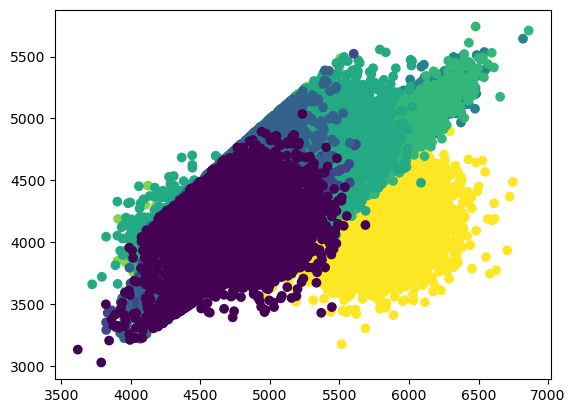

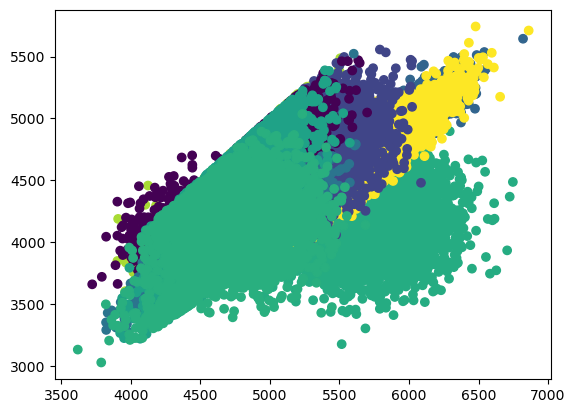

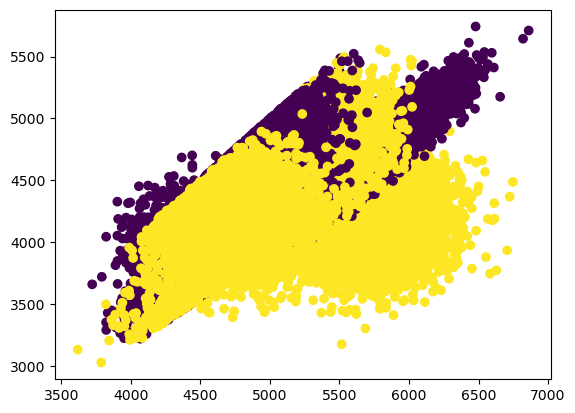

In [10]:
for col in list(df_treino.drop(columns=['renda', 'compras']).columns):
    plt.subplot()
    plt.scatter('renda', 'compras', c=col, data=df_treino)
    plt.show()

Observamos agrupamentos bem definidos, ideal para usarmos o modelo KNN, já que ele preve os novos dados com base nos dados mais proximos.

In [11]:
print('Estátistica Antes do Tratamento')
display(df_nulos.describe())

# Executa o modelo KNN Classifier para prever os valores nulos de cada coluna
for col in list(df_nulos.drop(columns=['renda', 'compras']).columns):
    
    # Separando os dados de treino X e y 
    X_train = df_treino.drop(columns=[col])
    y_train = df_treino[col]
    
    # Criando um padrão para a normalização dos dados
    padrao = MinMaxScaler()
    padrao.fit(X_train)
    
    # Aplicando a normalização nos dados
    X_pad = padrao.transform(X_train)
    
    # Criando o modelo KNN com 1% do total dos dados como vizinhança
    vizin = KNeighborsClassifier(n_neighbors=int(len(X_pad)*0.1))
    # Treinando o modelo
    vizin.fit(X_pad, y_train)
    
    # Separando os registros com a coluna resposta com valor nulo
    X = df_nulos.fillna(df_nulos.median())[df_nulos[col].isnull()].drop(columns=[col])
    
    # Aplicando a normalização nos dados
    X_pad = padrao.transform(X) 
    
    # Armazenando os dados da predição
    estimado = vizin.predict(X_pad)
    
    # Substituindo os valores nulos pelas predições
    df_nulos.loc[df_nulos[col].isnull(),col] = estimado
    
# Executa o modelo KNN Regressor para prever os valores nulos de cada coluna
for col in list(df_nulos.drop(columns=['sexo', 'idade', 'scrcrdt']).columns):

    # Separando os dados de treino X e y 
    X_train = df_treino.drop(columns=[col])
    y_train = df_treino[col]
    
    # Criando um padrão para a normalização dos dados
    padrao = MinMaxScaler()
    padrao.fit(X_train)
    
    # Aplicando a normalização nos dados
    X_pad = padrao.transform(X_train) 

    # Criando o modelo KNN com 1% do total dos dados como vizinhança
    vizin = KNeighborsRegressor(n_neighbors=int(len(X_pad)*0.1))
    # Treinando o modelo
    vizin.fit(X_pad, y_train)
    
    # Separando os registros com a coluna resposta com valor nulo
    X = df_nulos.fillna(df_nulos.median())[df_nulos[col].isnull()].drop(columns=[col])
    
    # Aplicando a normalização nos dados
    X_pad = padrao.transform(X) 
    
    # Armazenando os dados da predição
    estimado = vizin.predict(X_pad)
    
    # Substituindo os valores nulos pelas predições
    df_nulos.loc[df_nulos[col].isnull(),col] = estimado

print('Estátistica Após o Tratamento')
display(df_nulos.describe())

# Analise dos dados preenchidos 
df_nulos.head()

Estátistica Antes do Tratamento


renda       compras         idade       scrcrdt          sexo
count  19745.000000  19888.000000  19808.000000  19772.000000  19718.000000
mean    5120.903193   4327.773054     43.631109    561.059427      0.334720
std      537.764906    399.174810     11.040070    262.303631      0.471904
min     3616.008674   3177.674851     24.000000    107.000000      0.000000
25%     4682.687079   4020.060502     36.000000    392.000000      0.000000
50%     5024.133130   4284.136439     47.000000    614.000000      0.000000
75%     5583.186126   4642.445708     49.000000    662.000000      1.000000
max     6938.728355   5860.725306     62.000000    988.000000      1.000000

Estátistica Após o Tratamento


renda       compras         idade       scrcrdt          sexo
count  26178.000000  26178.000000  26178.000000  26178.000000  26178.000000
mean    5116.164869   4326.856278     43.362938    558.506074      0.320613
std      517.032092    372.303179     11.010233    261.301021      0.466721
min     3616.008674   3177.674851     24.000000    107.000000      0.000000
25%     4699.578154   4062.739443     36.000000    392.000000      0.000000
50%     4996.062239   4239.417407     47.000000    614.000000      0.000000
75%     5598.973914   4662.371925     49.000000    662.000000      1.000000
max     6938.728355   5860.725306     62.000000    988.000000      1.000000

renda      compras  idade  scrcrdt  sexo
3   5224.961569  4402.706456   41.0    392.0   0.0
7   5536.617748  4668.629839   41.0    392.0   0.0
9   6466.745833  5662.061170   41.0    392.0   0.0
11  5994.093525  4734.813833   41.0    392.0   0.0
13  5737.588727  4748.244534   41.0    392.0   0.0

Após o tratamento nossas médias e medianas mudaram um pouco e nosso desvio padrão diminui

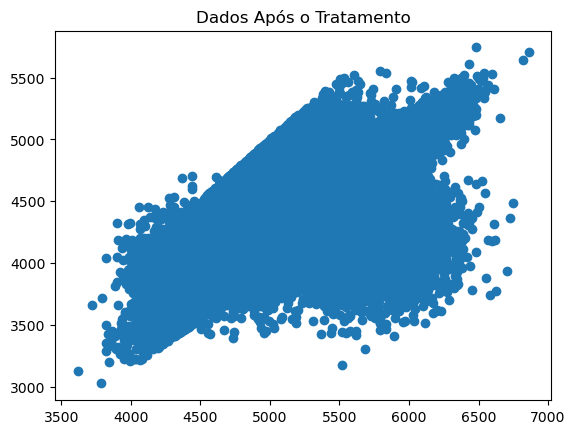

In [12]:
plt.scatter('renda', 'compras', data=df_treino)
plt.title('Dados Após o Tratamento')
plt.show()

Não foi gerado marcas (linhas) de tratamento.

In [13]:
# Concatenamos o DataFrame com os dados completos (df_treino) com o DataFrame com os dados nulos, agora preenchidos (df_nulos)
df_raw = pd.concat([df_nulos, df_treino], axis=0)

### Dados Duplicados

In [14]:
tamanho_ant = df_raw.shape[0] # Quantidade de registros antes do drop dos dados duplicados
print(f'Temos {tamanho_ant} registros')
df_raw.drop_duplicates(inplace=True) # Drop dos dados duplicados
print(f'Depois da exclusão dos dados duplicados temos {df_raw.shape[0]} registros, sendo {tamanho_ant - df_raw.shape[0]} dados excluidos.')

Temos 63918 registros
Depois da exclusão dos dados duplicados temos 63304 registros, sendo 614 dados excluidos.


### Analise de Outliers

In [15]:
round(df_raw['idade'].describe(),0)

count    63304.0
mean        44.0
std         11.0
min         24.0
25%         36.0
50%         47.0
75%         49.0
max         62.0
Name: idade, dtype: float64

<p>Na coluna idade temos clientes de 24 anos até 62 anos de idade. Não sendo necessário realizar algum tratamento devido as idades serem comuns em registros em geral.</p>

In [16]:
round(df_raw['scrcrdt'].describe(),0)

count    63304.0
mean       557.0
std        262.0
min        107.0
25%        392.0
50%        614.0
75%        662.0
max        988.0
Name: scrcrdt, dtype: float64

<p>A coluna "scrcrdt" está em uma escala de 0 a 1000.</p>

In [17]:
round(df_raw['sexo'].describe(),0)

count    63304.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          1.0
max          1.0
Name: sexo, dtype: float64

A coluna "sexo" só possui valores de 0 e 1

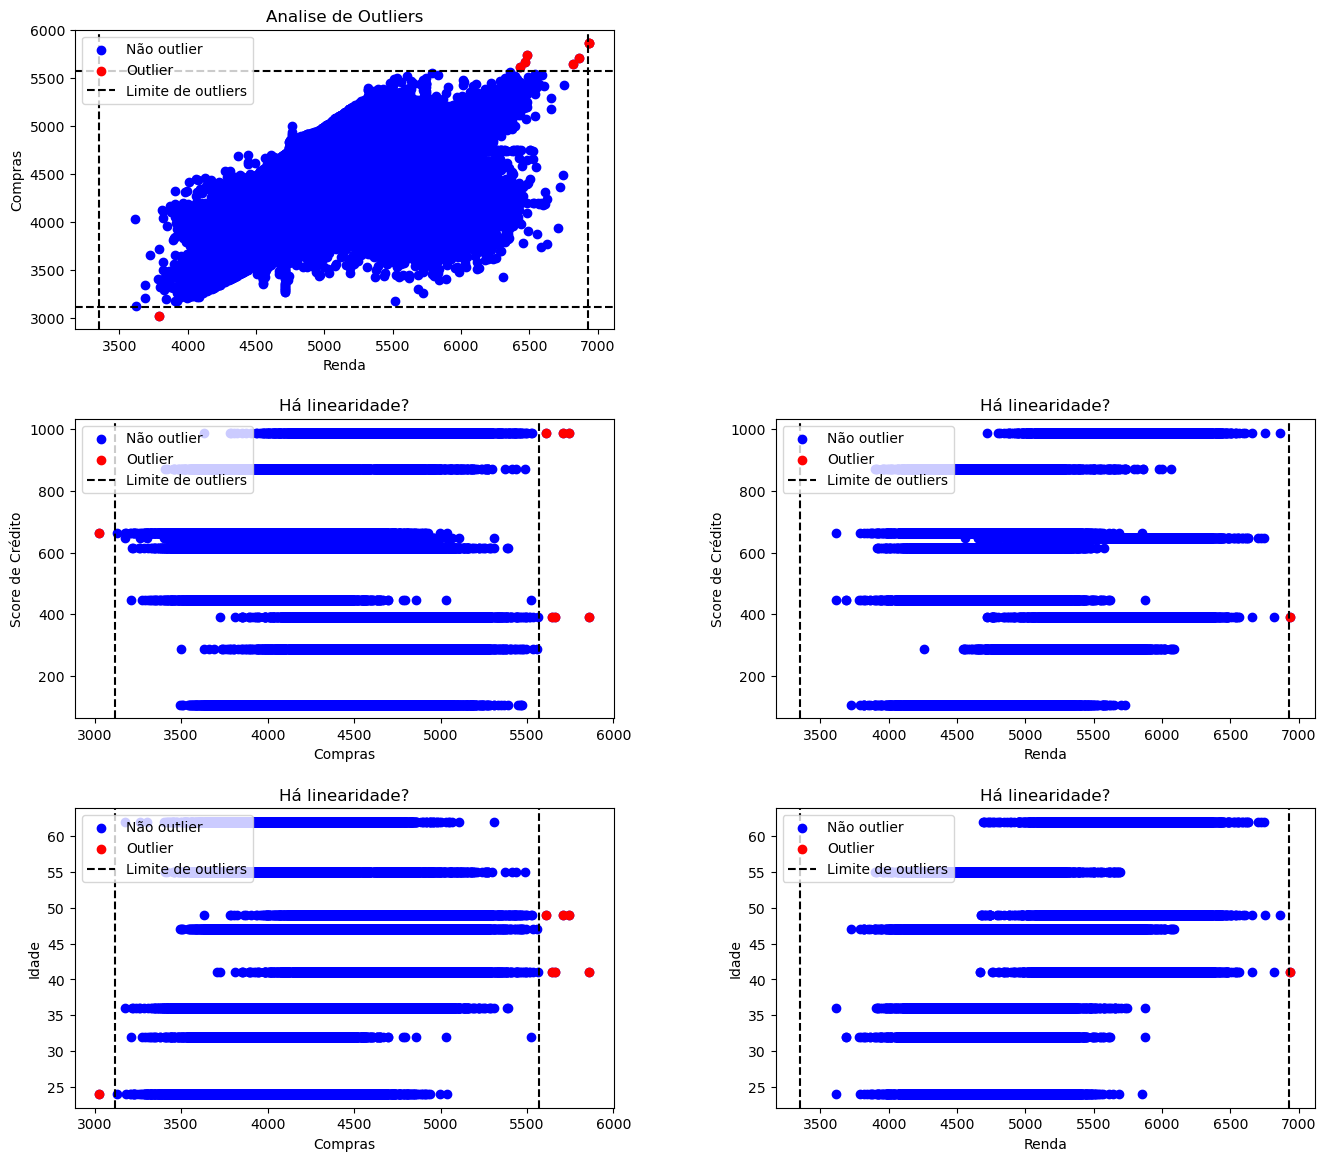

In [18]:
plt.figure(figsize=(16, 14))

# GRAFICO 01
ax = plt.subplot(3, 2, 1)
x = df_raw['renda']    # eixo x
y = df_raw['compras']  # eixo y

# Titulo dos eixos e do grafico
ax.set_title('Analise de Outliers')
ax.set_xlabel('Renda')
ax.set_ylabel('Compras')

ax.scatter(x, y, color='blue', label='Não outlier')  # Grafico com todos os dados

# Identificando outliers
## eixo x
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IIQ = Q3 - Q1
ls_r = Q3 + (1.5 * IIQ)  # limite superior
li_r = Q1 - (1.5 * IIQ)  # limite inferior
outliers_r = (x < li_r) | (x > ls_r)
###
ax.scatter(x[outliers_r], y[outliers_r], color='red', label='Outlier')  # Plotando outliers em vermelho
#### reta definindo o limite superior e inferior do eixo x
ax.axvline(ls_r, color='black', linestyle='--', label='Limite de outliers')
ax.axvline(li_r, color='black', linestyle='--')

## eixo y
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IIQ = Q3 - Q1
ls_c = Q3 + (1.5 * IIQ)  # limite superior
li_c = Q1 - (1.5 * IIQ)  # limite inferior
outliers_c = (y < li_c) | (y > ls_c)
###
ax.scatter(x[outliers_c], y[outliers_c], color='red')  # Plotando outliers em vermelho
#### reta definindo o limite superior e inferior do eixo y
ax.axhline(ls_c, color='black', linestyle='--')
ax.axhline(li_c, color='black', linestyle='--')

# Adicionar uma legenda
ax.legend(loc=2)



# GRAFICO 02
ax = plt.subplot(3, 2, 3)
x = df_raw['compras']  # eixo x
y = df_raw['scrcrdt']  # eixo y

# Titulo dos eixos e do grafico
ax.set_title('Há linearidade?')
ax.set_xlabel('Compras')
ax.set_ylabel('Score de Crédito')

ax.scatter(x, y, color='blue', label='Não outlier') # Grafico com todos os dados
ax.scatter(x[outliers_c], y[outliers_c], color='red', label='Outlier') # Plotando outliers em vermelho 

# Linhas 
## eixo x
ax.axvline(ls_c, color='black', linestyle='--', label='Limite de outliers')
ax.axvline(li_c, color='black', linestyle='--')

# Adicionar uma legenda
ax.legend(loc=2)



# GRAFICO 03
ax = plt.subplot(3, 2, 4)
x = df_raw['renda']  # eixo x

# Titulo dos eixos e do grafico
ax.set_title('Há linearidade?')
ax.set_xlabel('Renda')
ax.set_ylabel('Score de Crédito')

ax.scatter(x, y, color='blue', label='Não outlier') # Grafico com todos os dados
ax.scatter(x[outliers_r], y[outliers_r], color='red', label='Outlier') # Plotando outliers em vermelho eixo x

# Linhas 
## eixo x
ax.axvline(ls_r, color='black', linestyle='--', label='Limite de outliers')
ax.axvline(li_r, color='black', linestyle='--')

# Adicionar uma legenda
ax.legend(loc=2)



# Grafico 04
ax = plt.subplot(3, 2, 5)
x = df_raw['compras']  # eixo x
y = df_raw['idade']  # eixo y

# Titulo dos eixos e do grafico
ax.set_title('Há linearidade?')
ax.set_xlabel('Compras')
ax.set_ylabel('Idade')

ax.scatter(x, y, color='blue', label='Não outlier') # Grafico com todos os dados
ax.scatter(x[outliers_c], y[outliers_c], color='red', label='Outlier') # Plotando outliers em vermelho eixo x

# Linhas 
## eixo x
ax.axvline(ls_c, color='black', linestyle='--', label='Limite de outliers')
ax.axvline(li_c, color='black', linestyle='--')

# Adicionar uma legenda
ax.legend(loc=2)



# GRAFICO 05
ax = plt.subplot(3, 2, 6)
x = df_raw['renda']  # eixo x

# Titulo dos eixos e do grafico
ax.set_title('Há linearidade?')
ax.set_xlabel('Renda')
ax.set_ylabel('Idade')

ax.scatter(x, y, color='blue', label='Não outlier') # Grafico com todos os dados
ax.scatter(x[outliers_r], y[outliers_r], color='red', label='Outlier') # Plotando outliers em vermelho eixo x

# Linhas 
## eixo x
ax.axvline(ls_r, color='black', linestyle='--', label='Limite de outliers')
ax.axvline(li_r, color='black', linestyle='--')
    
# Adicionar uma legenda
ax.legend(loc=2)   
    
    
    
# Ajusta espaçamento entre subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Mostra o gráfico
plt.show()

In [19]:
print(f'Temos {len(x[outliers_r]) + len(y[outliers_r])} outliers na coluna renda')
print(f'Temos {len(x[outliers_c]) + len(y[outliers_c])} outliers na coluna compras')

Temos 2 outliers na coluna renda
Temos 14 outliers na coluna compras


<h3>Analise</h3>
<p>Encontramos outliers nas colunas "renda" e "compras", e eles não ajudam a explicar uma linearidade nos dados. Como são poucos outliers iremos tratar com o valor da mediana.</p>

#### Tratamento

In [20]:
# Tratando os outliers com a mediana
x = df_raw['renda']  # eixo x
y = df_raw['compras']  # eixo y
x[outliers_r] = np.median(x)
y[outliers_c] = np.median(y)

### Analise do Tipo das Colunas

In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63304 entries, 3 to 63915
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   renda    63304 non-null  float64
 1   compras  63304 non-null  float64
 2   idade    63304 non-null  float64
 3   scrcrdt  63304 non-null  float64
 4   sexo     63304 non-null  float64
dtypes: float64(5)
memory usage: 2.9 MB


---

In [22]:
((df_raw.idade % 1) > 0).value_counts()

False    63304
Name: idade, dtype: int64

<p>A coluna "idade" não possui valores com casa decimal.</p>

In [23]:
((df_raw.sexo % 1) > 0).value_counts()

False    63304
Name: sexo, dtype: int64

<p>A coluna "sexo" não possui valores com casa decimal.</p>

In [24]:
((df_raw.scrcrdt % 1) > 0).value_counts()

False    63304
Name: scrcrdt, dtype: int64

<p>A coluna "scrcrdt" não possui valores com casa decimal.</p>

---

<h3>Conclusão</h3>
<p>Há colunas com o tipo de dados errado, como:</p>
<p>- Sexo</p>
<p>- Idade</p>
<p>- Scrcdt</p>
<p>Que deveriam ser respectivamente: categorica, inteiro e inteiro.</p>

#### Tratamento

In [25]:
df_raw = df_raw.convert_dtypes()
df_raw['sexo'] = df_raw['sexo'].astype('category')
df_raw['renda'] = df_raw['renda'].round(2)
df_raw['compras'] = df_raw['compras'].round(2)
df_raw.dtypes

renda       Float64
compras     Float64
idade         Int64
scrcrdt       Int64
sexo       category
dtype: object

### Renomeando as Colunas

In [26]:
dic = {
    'compras' : 'compra'
}
df_raw.rename(columns=dic, inplace=True)
df_raw.head(0)

Empty DataFrame
Columns: [renda, compra, idade, scrcrdt, sexo]
Index: []

### Exportando o DF

In [27]:
df_raw.to_csv('empresa2_tratada.csv', sep=';', index=False)

# Analise Exploratoria dos Dados

In [28]:
# Importando DataFrame Tratado
df = pd.read_csv('../2_bases_tratadas/empresa2_tratada.csv', sep=';')
df['sexo'] = df['sexo'].astype('category') # Arrumando o tipo da coluna para categorica
df.head(2)

renda   compra  idade  scrcrdt sexo
0  5224.96  4402.71     41      392    0
1  5536.62  4668.63     41      392    0

## Analise Descritiva

In [29]:
df.describe().round(2)

renda    compra     idade   scrcrdt
count  63304.00  63304.00  63304.00  63304.00
mean    5117.88   4325.44     43.56    557.01
std      527.84    389.20     11.06    262.42
min     3616.01   3130.74     24.00    107.00
25%     4693.59   4036.12     36.00    392.00
50%     5012.46   4266.43     47.00    614.00
75%     5587.26   4649.23     49.00    662.00
max     6860.53   5564.39     62.00    988.00

<h3>renda</h3>
<p>- A coluna "renda" possui uma <strong>média de RS5117.88</strong></p>
<p>- Os valores se <strong>desviam RS527.84	</strong> da média</p>
<p>- Valor maximo de <strong>RS6860.53</strong> e valor minimo de <strong>RS3616.01</strong></p>
<p>- E o <strong>valor central</strong> dessa variavel é de <strong>RS5012.46</strong></p>
<h3>compra</h3>
<p>- A coluna "compra" possui uma <strong>média de RS4325.44</strong></p>
<p>- Os valores se <strong>desviam RS389.20</strong> da média</p>
<p>- Valor maximo de <strong>RS5564.39</strong> e valor minimo de <strong>RS3130.74</strong></p>
<p>- E o <strong>valor central</strong> dessa variavel é de <strong>RS4266.43</strong></p>
<h3>idade</h3>
<p>- A coluna "idade" possui uma <strong>média de 43 anos</strong></p>
<p>- As idades se <strong>desviam 11 anos</strong> em média</p>
<p>- A idade maxima é de <strong>62 anos</strong> e a idade minima é de <strong>24 anos</strong></p>
<p>- E a <strong>idade central</strong> é de <strong>47 anos</strong></p>
<h3>scrcrdt</h3>
<p>- A coluna "scrcrdt" possui uma <strong>média de 557</strong></p>
<p>- O score se <strong>desvia em 262 pontos</strong> da média de score</p>
<p>- E o <strong>score central</strong> é de <strong>614 pontos</strong></p>

## Analise de Frequencias

### Renda

<Axes: >

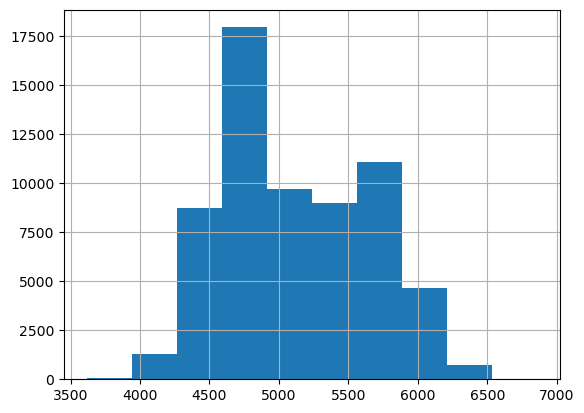

In [30]:
df['renda'].hist()

<h3>Analise</h3>
<p>Distribuição normal</p>
<p>A maior parte dos nossos clientes estão entre 4500 a 5000</p>

### Compra

<Axes: >

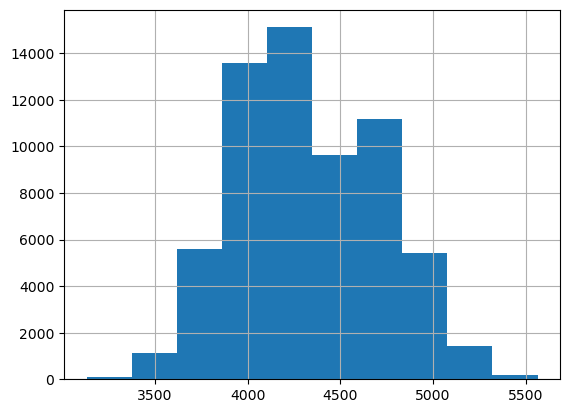

In [31]:
df['compra'].hist()

<h3>Analise</h3>
<p>Distribuição normal</p>
<p>A maior parte dos nossos clientes estão entre 3800 a 4400 de gasto</p>

### Idade

<Axes: >

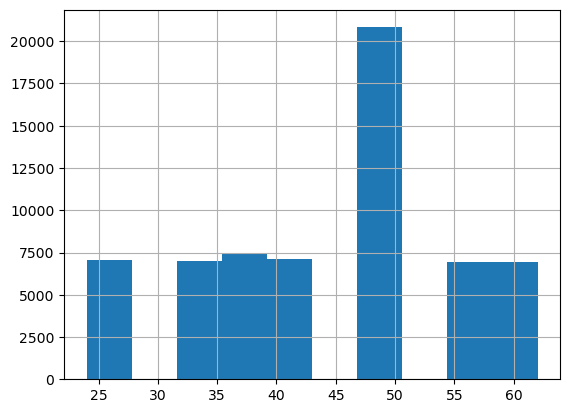

In [32]:
df['idade'].hist()

In [33]:
((df['idade'].value_counts()))

47    13869
36     7435
41     7116
24     7052
32     6976
55     6966
49     6957
62     6933
Name: idade, dtype: int64

<h3>Analise</h3>
<p>A maior parte dos nossos clientes tem 47 anos, sendo o total 19033 clientes.</p>

### Scrcrdt

<Axes: >

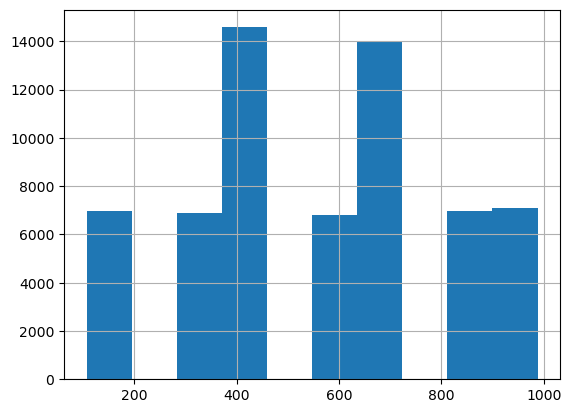

In [34]:
df['scrcrdt'].hist()

<Axes: >

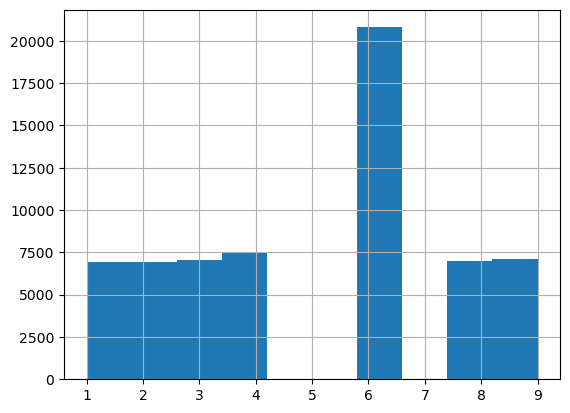

In [35]:
# Criando faixas de score de 100 em 100
bins = list(range(0,1001, 100))
labels = list(range(0, 10))
df['fx_scrcrdt'] = pd.cut(x = df.scrcrdt,
                                bins = bins,
                                labels = labels,
                                include_lowest = True)
df['fx_scrcrdt'].hist()

In [36]:
df.query('fx_scrcrdt == 6')['scrcrdt'].unique() # analisando a faixa de score

array([614, 648, 662], dtype=int64)

<h3>Analise</h3>
<p>Na coluna score a faixa 6, 600 a 700 de score, temos a maior parte dos nossos clientes.</p>

### Sexo

<Axes: >

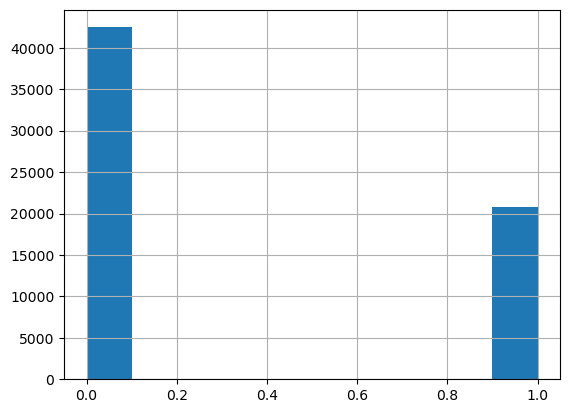

In [37]:
df['sexo'].hist()

In [38]:
# Dados para o gráfico de pizza
labels = ['Feminino', 'Masculino']
values = [round(df['sexo'].value_counts()[0] * 100 / len(df), 2)
             ,round(df['sexo'].value_counts()[1] * 100 / len(df), 2)]

# Dados da legenda interativa
informacoes1 = ['Qtd Clientes: {}'.format(i) for i in [df['sexo'].value_counts()[0]
                                                                ,df['sexo'].value_counts()[1]]]
# Criar a figura do gráfico de pizza
fig = go.Figure(data=[go.Pie(labels=labels, values=values
                             ,hovertemplate=informacoes1
                             ,name='')])

# Configurar o layout do gráfico
fig.update_layout(
    title='Quantidade de Clientes Agrupados por Sexo',
    showlegend=True
)

# Exibir o gráfico de pizza interativo
fig.show()

## Analise da Correlação

C:\Users\F0ndg\AppData\Local\Temp\ipykernel_8900\3951248285.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



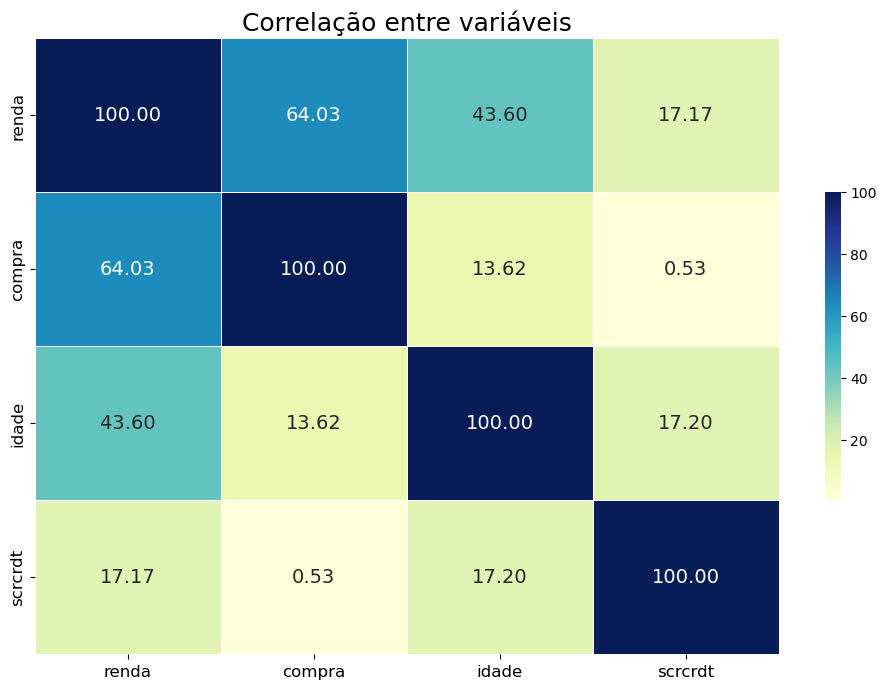

In [39]:
# Define tamanho da figura
plt.figure(figsize=(12, 8))

# Cria o heatmap 
sns.heatmap((df.corr() * 100), # padroniza os valores para mostrar como 56 ao inves de 0.56
            annot=True, # Mostra anotações
            cmap='YlGnBu',  # seleciona uma paleta de cores mais atraente
            linewidths=0.5, 
            linecolor='white', 
            annot_kws={"fontsize":14},  # ajusta o tamanho da fonte dos rótulos
            fmt='.2f',  # formata os valores das células com 2 casas decimais
            cbar_kws={"shrink": .5})  # ajusta o tamanho da barra de cores

# Define o título do gráfico e ajusta o tamanho da fonte
plt.title('Correlação entre variáveis', fontsize=18)

# Ajusta o tamanho da fonte dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostra o gráfico
plt.show()

<h3>Analise</h3>
<p>- "renda" possui uma altíssima correlação com a variavel "compra" (64.03%). Porém isso já é esperado, quanto mais renda um cliente tiver provavelmente mais gasto ele vai ter. Por isso, nenhuma das variaveis seram excluidas, já que trazem informações distintas e relevantes para o nosso modelo.</p>
<p>- "renda" possui uma correlação alta com a variavel "idade" (43.60%)</p>

## Analise Comportamental das Variaveis

### Pairplot

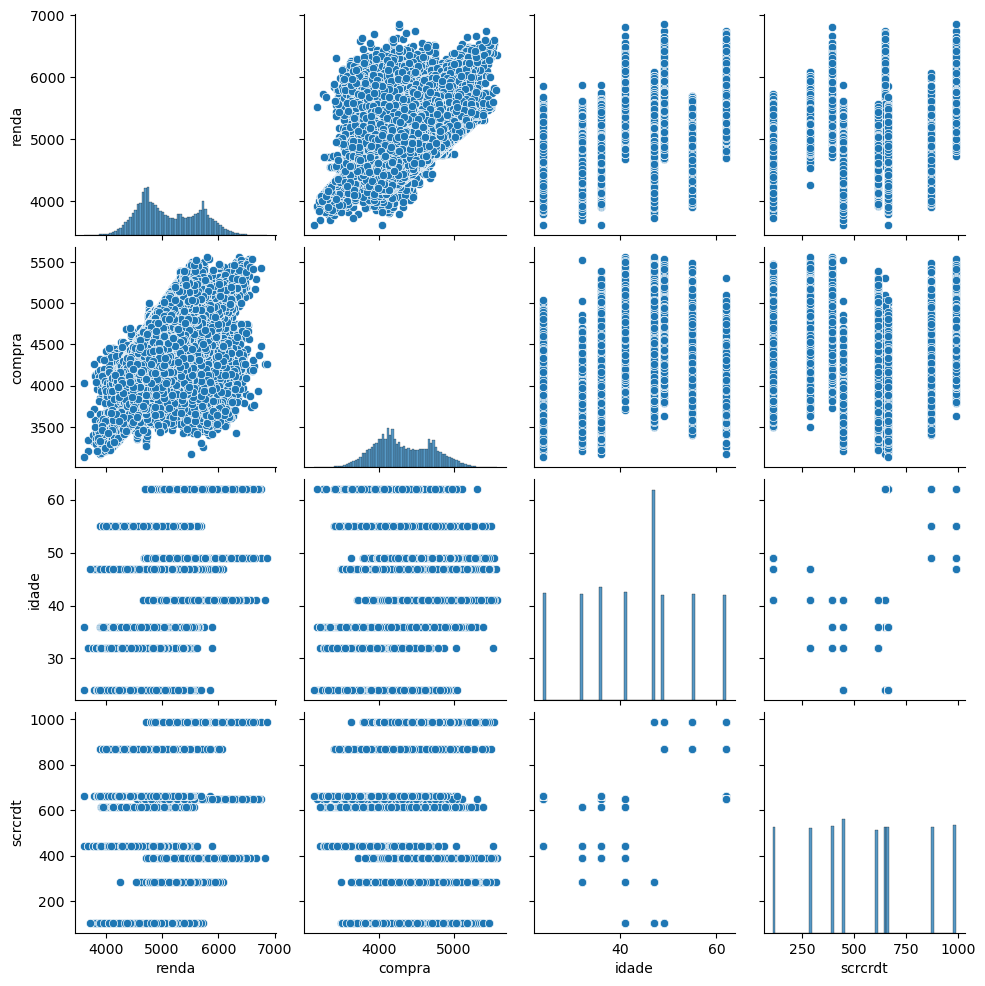

In [40]:
sns.pairplot(df)

Não é observado nenhuma linearidade forte entre as variaveis

Encontramos uma visualização interressante nas variaveis: compra X renda

### Compra X Renda Agrupado 

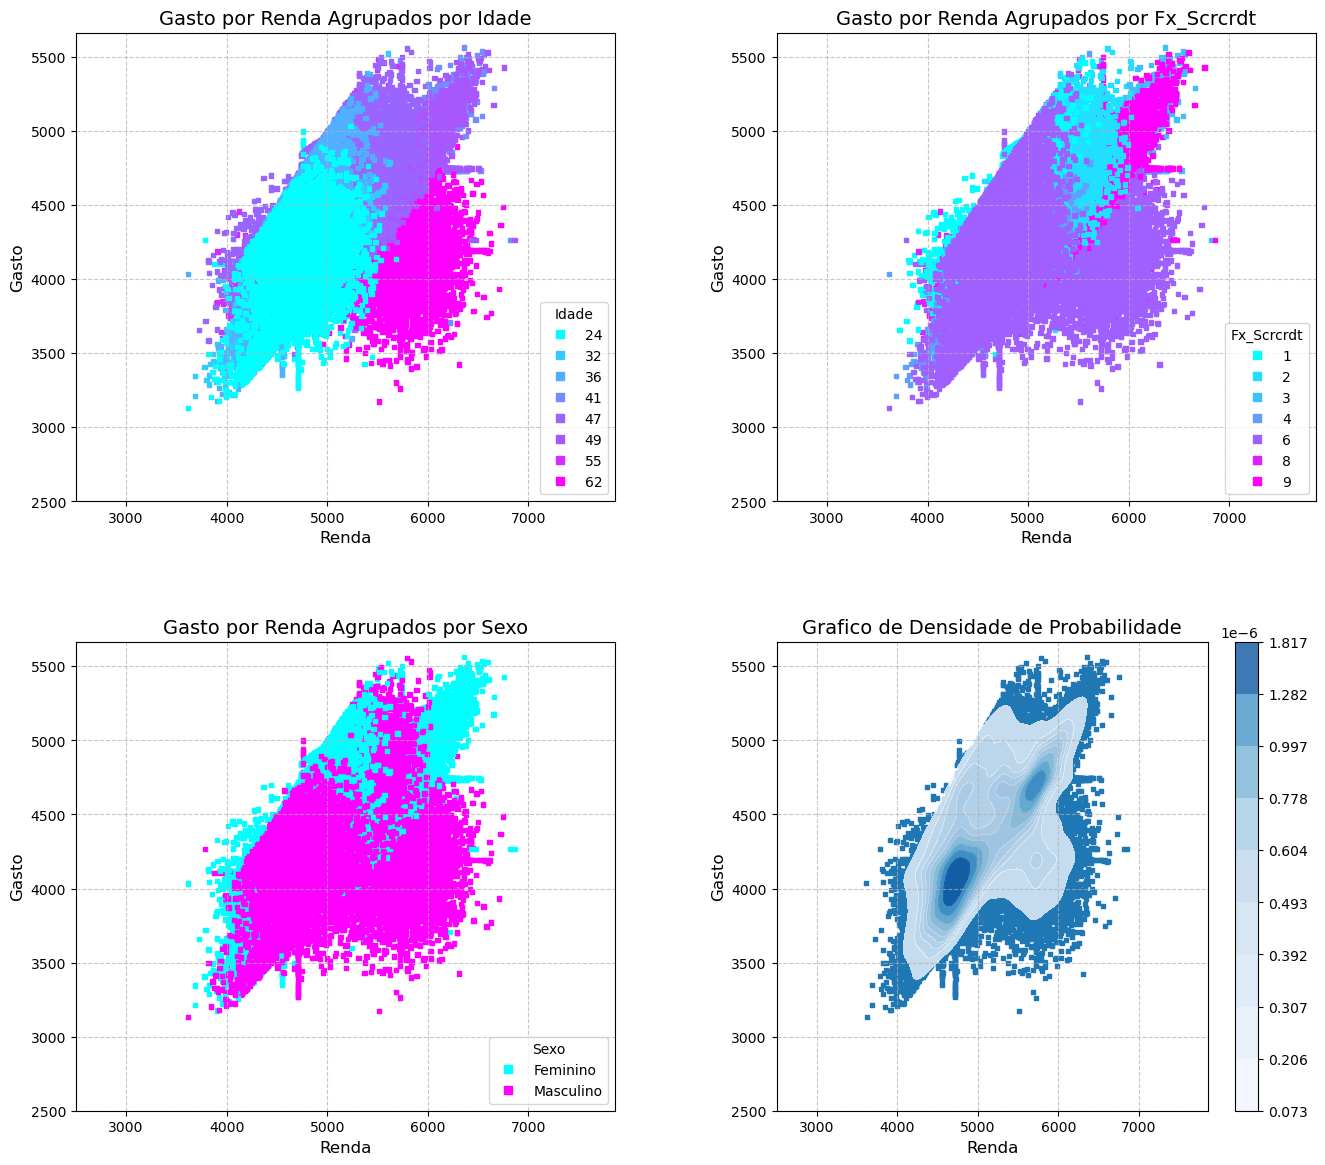

In [41]:
# Define tamanho do gráfico
plt.figure(figsize=(16, 14))

# Cria subplots para cada variável
for i, col in enumerate(['idade', 'fx_scrcrdt', 'sexo', '']):
    ax = plt.subplot(2, 2, i+1) # 2 linhas por 2 colunas
    
    if i == 3: # Grafico de densidade de probabilidade ficara na segunda linha da segunda coluna
        # Plota gráfico de dispersão
        scatter_plot = ax.scatter(x='renda', y='compra', data=df, s=10, marker='s')
        ax.set_title(f'Grafico de Densidade de Probabilidade', fontsize=14)
        ax.set_xlabel('Renda', fontsize=12)
        ax.set_ylabel('Gasto', fontsize=12)

        # Adiciona gráfico de densidade
        sns.kdeplot(x=df['renda'], y=df['compra'], cmap="Blues", levels=10# niveis de densidade
                    , fill=True, ax=ax, alpha=0.8, legend=False, cbar=True)

        # Adiciona grade
        plt.grid(True, linestyle='--', alpha=0.7)

        # Ajusta escala dos eixos
        ax.set_xlim(2500, max(df['renda'])+1000)
        ax.set_ylim(2500, max(df['compra'])+100)
        
    else:
        # Plota gráfico de dispersão
        scatter_plot = ax.scatter(x='renda', y='compra', data=df, c=col, cmap='cool', s=10, marker='s')
        ax.set_title(f'Gasto por Renda Agrupados por {col.title()}', fontsize=14)
        ax.set_xlabel('Renda', fontsize=12)
        ax.set_ylabel('Gasto', fontsize=12)

        # Adiciona grade
        plt.grid(True, linestyle='--', alpha=0.7)

        # Ajusta escala dos eixos
        ax.set_xlim(2500, max(df['renda'])+1000)
        ax.set_ylim(2500, max(df['compra'])+100)

        # Cria legenda com valor associado a cada cor
        if col == 'sexo':
            unique_vals = np.array(['Feminino', 'Masculino'])
        else:
            unique_vals = np.unique(df[col])
        legend_labels = [f'{val}' for val in unique_vals]
        ax.legend(handles=scatter_plot.legend_elements()[0], title = f'{col.title()}',labels=legend_labels, loc=4)
        
# Ajusta espaçamento entre subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Mostra o gráfico
plt.show()

<h3>Aviso</h3>
Os numeros a seguir foram tirados de uma analise visual, não são numeros **EXATOS**

---

<meta charset="utf-8">
<h3>Gasto por Renda Agrupados por Idade</h3>
<h4>Analise dos grupos observados:</h4>
    <p>01 - Concentração de pessoas com 24 anos variando a renda de 4000,00 a 5500,00 
        e gasto varia de 3400,00 a 4800,00</p>
    <p>02 - Concentração de pessoas com 55 anos variando a renda de 5200,00 a 6300,00
        e gasto varia de 3500,00 a 4700,00
    <p>03 - Concentração de pessoas com 41 anos variando a renda de 4800,00 a 5300,00
        e gasto varia de 4800,00 a 5200,00</p>
    <p>04 - Concentração de pessoas com 47 anos variando a renda de 5300,00 a 5800,00 
        e gasto varia de 4500,00 a 5300,00</p>
    <p>05 - Concentração de pessoas com 49 anos variando a renda de 5800,00 a 6300,00
        e gasto varia de 4800,00 a 5200,00</p>
      
      
<h3>Gasto por Renda Agrupados por Fx_Score</h3>
<h4>Analise dos grupos observados:</h4>
    <p>01 - É a junção dos grupos 01, 02 e 03 da analise anterior. Eles representam a faixa 6 de score (600 a 700 de score)</p>
    <p>02 - É o grupo 05 da analise anterior. Ele representa a faixa 8 de score (800 a 900 de score)</p>
    <p>03 - É o grupo 04 da analise anterior. Ele representa a faixa 3 de score (300 a 400 de score)</p>
  

<h3>Gasto por Renda Agrupados por Sexo</h3>
<h4>Analise dos grupos observados:</h4>
    <p>01 - É a junção dos grupos 01, 02 e 04 da primeira analise. Eles representam o sexo Masculino</p>
    <p>02 - É a junção dos grupos 03 e 05 da primeira analise. Eles representam o sexo Feminino</p>
    
    
<h3>Grafico de Densidade de Probabilidade</h3>
<h4>Caracteristicas mais provaveis dos nossos proximos clientes:</h4>
    <p>24 e 47 anos</p>
    <p>Faixa 3 e 6 de score</p>    
    <p>Sexo Masculino</p>    
    <p>Renda entre 4500 a 5000 ou 5500 a 6000</p>    
    <p>Compras entre 3500 a 4200 ou 4500 a 4800</p>    
    

---

### Compra X Renda por Idade

In [42]:
# Dados para o gráfico de renda e gasto médio
lista_idade = sorted(df['idade'].unique())
gasto_medio = []
renda_media = []
for idade in lista_idade:
    gasto_medio.append(round(df.query(f'idade == {idade}')['compra'].mean(),2))
    renda_media.append(round(df.query(f'idade == {idade}')['renda'].mean(),2))

# Dados para o gráfico de dinheiro economizado em média
economizou = np.array(renda_media) - np.array(gasto_medio)
x = lista_idade
y = economizou

# Cria uma lista com as informações para cada marcador do gráfico de renda e gasto médio
informacoes1 = ['Idade: {}<br>Gasto: R${:.2f}'.format(i, g) for i, g in zip(lista_idade, gasto_medio)]
informacoes2 = ['Idade: {}<br>Renda: R${:.2f}'.format(i, g) for i, g in zip(lista_idade, renda_media)]

# Cria objetos Scatter para cada gráfico
grafico_gasto = go.Scatter(x=lista_idade, y=gasto_medio, mode='lines+markers', 
                     marker=dict(size=8, color='#9439e3'),
                     hovertemplate='%{text}',
                     text=informacoes1,
                     name='Gasto Médio')

grafico_renda = go.Scatter(x=lista_idade, y=renda_media, mode='lines+markers', 
                     marker=dict(size=8, color='#ffa600'),
                     hovertemplate='%{text}',
                     text=informacoes2,
                     name='Renda Média')

# Cria objeto Bar para o gráfico de dinheiro economizado
grafico_economia = go.Bar(x=x, y=y, hovertemplate='Idade: %{x} <br>Economizado: R$ %{y}'
                              , name='')

# Cria um objeto Subplot do Plotly com dois eixos y, um para cada gráfico
fig = make_subplots(rows=2, cols=1, specs=[[{'secondary_y': True}], [{}]], subplot_titles=('Renda e Gasto Médio por Idade', 'Dinheiro Economizado em Média por Idade'))

# Adiciona os objetos Scatter ao Subplot, um para cada gráfico
fig.add_trace(grafico_gasto, row=1, col=1, secondary_y=False)
fig.add_trace(grafico_renda, row=1, col=1, secondary_y=True)

# Adiciona o objeto Bar ao Subplot
fig.add_trace(grafico_economia, row=2, col=1)

# Define o título e rótulos dos eixos
fig.update_layout(title='Análise de Dados Financeiros por Idade', font=dict(size=16), plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=980, height=900)

# Grafico 01
fig.update_xaxes(title_text='Idade', gridcolor='#E8E8E8')
## 1° eixo y
fig.update_yaxes(title_text='Gasto Médio (R$)', gridcolor='#E8E8E8', secondary_y=False, range=[3500, max(gasto_medio+renda_media)*1.1], showgrid=True, row=1, col=1)
## 2° eixo y
fig.update_yaxes(title_text='Renda Média (R$)', gridcolor='#E8E8E8', secondary_y=True, range=[3500, max(gasto_medio+renda_media)*1.1], showgrid=True, row=1, col=1)

# Grafico 02
fig.update_xaxes(title_text='Idade', gridcolor='#E8E8E8')
fig.update_yaxes(title_text='Economizado em Média (R$)', gridcolor='#E8E8E8',  range=[0, max(economizou)*1.1], showgrid=True, row=2, col=1)

# Exibe o gráfico interativo
fig.show()


<h3>Analise</h3>
<p>Não há uma linearidade nos dados</p>

### Compra X Renda por Sexo

In [43]:
# Dados para o gráfico de renda e gasto médio
lista_sexo = sorted(df['sexo'].unique())
gasto_medio = []
renda_media = []
for sexo in lista_sexo:
    gasto_medio.append(round(df.query(f'sexo == {sexo}')['compra'].mean(),2))
    renda_media.append(round(df.query(f'sexo == {sexo}')['renda'].mean(),2))

# Dados para o gráfico de dinheiro economizado em média
economizou = np.array(renda_media) - np.array(gasto_medio)

tab_vizu = pd.DataFrame({'Gasto Médio' : gasto_medio, 'Renda Média': renda_media, 'Economizou em Média': economizou})
tab_vizu.rename(index={0:'Feminino', 1:'Masculino'}, inplace=True)
tab_vizu.rename_axis('Sexo', axis=1, inplace=True)
tab_vizu

Sexo       Gasto Médio  Renda Média  Economizou em Média
Feminino       4321.62      5054.52               732.90
Masculino      4333.20      5247.01               913.81

In [44]:
# 100 5054.52
# x   5247.01

print('A diferença em (%) de quanto o sexo masculino ganha a mais feminino é de:')
print(f'{round((5247.01	 * 100 / 5054.52)-100, 2)}%')

A diferença em (%) de quanto o sexo masculino ganha a mais feminino é de:
3.81%


In [45]:
# 100 732.90
# x   913.81

print('A diferença em (%) de quanto o sexo masculino economiza a mais entre o sexo feminino é de:')
print(f'{round((913.81 * 100 / 732.90)-100, 2)}%')

A diferença em (%) de quanto o sexo masculino economiza a mais entre o sexo feminino é de:
24.68%


<h3>Analise</h3>
<p>Considerando os valores de renda e de gasto em média entre o sexo masculino e feminino, não temos tanta diferença, vemos claramente no final, quanto foi economizado, que o público Masculino acaba economizando em média 24.68% a mais que o público Feminino.</p>

### Compra X Renda por Faixa de Score

In [46]:
# Dados para o gráfico de renda e gasto médio
lista_fx_scrcrdt = sorted(df['fx_scrcrdt'].unique())
gasto_medio = []
renda_media = []
for fx in lista_fx_scrcrdt:
    gasto_medio.append(round(df.query(f'fx_scrcrdt == {fx}')['compra'].mean(),2))
    renda_media.append(round(df.query(f'fx_scrcrdt == {fx}')['renda'].mean(),2))

# Dados para o gráfico de dinheiro economizado em média
economizou = np.array(renda_media) - np.array(gasto_medio)
x = lista_fx_scrcrdt
y = economizou

# Cria uma lista com as informações para cada marcador do gráfico de renda e gasto médio
informacoes1 = ['Fx: {}<br>Gasto: R${:.2f}'.format(i, g) for i, g in zip(lista_fx_scrcrdt, gasto_medio)]
informacoes2 = ['Fx: {}<br>Renda: R${:.2f}'.format(i, g) for i, g in zip(lista_fx_scrcrdt, renda_media)]

# Cria objetos Scatter para cada gráfico
grafico_gasto = go.Scatter(x=lista_fx_scrcrdt, y=gasto_medio, mode='lines+markers', 
                     marker=dict(size=8, color='#9439e3'),
                     hovertemplate='%{text}',
                     text=informacoes1,
                     name='Gasto Médio')

grafico_renda = go.Scatter(x=lista_fx_scrcrdt, y=renda_media, mode='lines+markers', 
                     marker=dict(size=8, color='#ffa600'),
                     hovertemplate='%{text}',
                     text=informacoes2,
                     name='Renda Média')

# Cria objeto Bar para o gráfico de dinheiro economizado
grafico_economia = go.Bar(x=x, y=y, hovertemplate='Fx: %{x} <br>Economizado: R$ %{y}'
                              , name='')

# Cria um objeto Subplot do Plotly com dois eixos y, um para cada gráfico
fig = make_subplots(rows=2, cols=1, specs=[[{'secondary_y': True}], [{}]], subplot_titles=('Renda e Gasto Médio por Idade', 'Dinheiro Economizado em Média por Idade'))

# Adiciona os objetos Scatter ao Subplot, um para cada gráfico
fig.add_trace(grafico_gasto, row=1, col=1, secondary_y=False)
fig.add_trace(grafico_renda, row=1, col=1, secondary_y=True)

# Adiciona o objeto Bar ao Subplot
fig.add_trace(grafico_economia, row=2, col=1)

# Define o título e rótulos dos eixos
fig.update_layout(title='Análise de Dados Financeiros por Fx_Scrcrdt', font=dict(size=16), plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=980, height=900)

# Grafico 01
fig.update_xaxes(title_text='Fx_Scrcrdt', gridcolor='#E8E8E8')
## 1° eixo y
fig.update_yaxes(title_text='Gasto Médio (R$)', gridcolor='#E8E8E8', secondary_y=False, range=[3500, max(gasto_medio+renda_media)*1.1], showgrid=True, row=1, col=1)
## 2° eixo y
fig.update_yaxes(title_text='Renda Média (R$)', gridcolor='#E8E8E8', secondary_y=True, range=[3500, max(gasto_medio+renda_media)*1.1], showgrid=True, row=1, col=1)

# Grafico 02
fig.update_xaxes(title_text='Fx_Scrcrdt', gridcolor='#E8E8E8')
fig.update_yaxes(title_text='Economizado em Média (R$)', gridcolor='#E8E8E8',  range=[0, max(economizou)*1.1], showgrid=True, row=2, col=1)

# Exibe o gráfico interativo
fig.show()


<h3>Analise</h3>
<p>- As faixas que possuem a maior renda são as faixas 3 e 9</p>
<p>- As faixas que possuem o maior gasto são as faixas 2, 3 e 9</p>
<p>- As faixas que mais economizam são as faixas com a maior renda, que são as faixas 3 e 9</p>


### Score X Idade

In [47]:
# Dados para o gráfico de renda e gasto médio
lista_idade = sorted(df['idade'].unique())
scrcrdt_medio = []
for idade in lista_idade:
    scrcrdt_medio.append(int(df.query(f'idade == {idade}')['scrcrdt'].mean()))

# Criando uma figura com o grafico de barras
fig = go.Figure(data=[go.Bar(x=lista_idade, y=scrcrdt_medio, hovertemplate='Idade: %{x} <br>Score: %{y}'
                              , name='')])

# Define o título e rótulos dos eixos
fig.update_layout(title='Score de Crédito em Média por Idade', font=dict(size=16), plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', width=980, height=600)

fig.update_xaxes(title_text='Idade', gridcolor='#E8E8E8')
fig.update_yaxes(title_text='Score de Crédito em Média', gridcolor='#E8E8E8',  range=[0, 1000], showgrid=True)

# Exibe o gráfico interativo
fig.show()

<h3>Analise</h3>
<p>A partir dos 49 anos é notado uma decrescente no score em média<p>

### Score X Sexo

In [48]:
# Dados para o gráfico de renda e gasto médio
lista_sexo = sorted(df['sexo'].unique())
scrcrdt_medio = []
for sexo in lista_sexo:
    scrcrdt_medio.append(int(df.query(f'sexo == {sexo}')['scrcrdt'].mean()))

tab_vizu = pd.DataFrame({'Score De Crédito em Média' : scrcrdt_medio})
tab_vizu.rename(index={0:'Feminino', 1:'Masculino'}, inplace=True)
tab_vizu.rename_axis('Sexo', axis=1, inplace=True)
tab_vizu

Sexo       Score De Crédito em Média
Feminino                         569
Masculino                        532

<h3>Analise</h3>
<p>O score em média entre os sexos não variam tanto<p>

### Sexo X Idade

In [49]:
# Dados para o gráfico de renda e gasto médio
lista_sexo = sorted(df['sexo'].unique())
idade_media = []
for sexo in lista_sexo:
    idade_media.append(str(int(df.query(f'sexo == {sexo}')['idade'].mean())) + ' anos')

tab_vizu = pd.DataFrame({'Idade Média' : idade_media})
tab_vizu.rename(index={0:'Feminino', 1:'Masculino'}, inplace=True)
tab_vizu.rename_axis('Sexo', axis=1, inplace=True)
tab_vizu

Sexo      Idade Média
Feminino      43 anos
Masculino     44 anos

<h3>Analise</h3>
<p>A idade em média entre os sexos não variam tanto<p>

# Modelagem

In [50]:
# Parametros para os clusters
X = df.drop(columns=['scrcrdt'])

## KMeans

### Quantidade de Clusters

In [51]:
# Calcula o WCSS Score que cada numero de clusters gera
def calculate_wcss(data, numero_max_cluster):
    wcss = []
    for n in range(2, numero_max_cluster + 1):
        kmeans = KMeans(n_clusters=n, n_init=10)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

# Calcula o ponto mais distance da reta, ou seja, o melhor numero de clusters
def optimal_number_of_clusters(wcss, numero_max_cluster):
    x1, y1 = 2, wcss[0]
    x2, y2 = numero_max_cluster, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [52]:
#
numero_max_cluster = 20
#
wcss_scores = calculate_wcss(X, numero_max_cluster)
n_clus = optimal_number_of_clusters(wcss_scores, numero_max_cluster)
#
print(f'O melhor numero de cluster é de {n_clus}')

O melhor numero de cluster é de 7


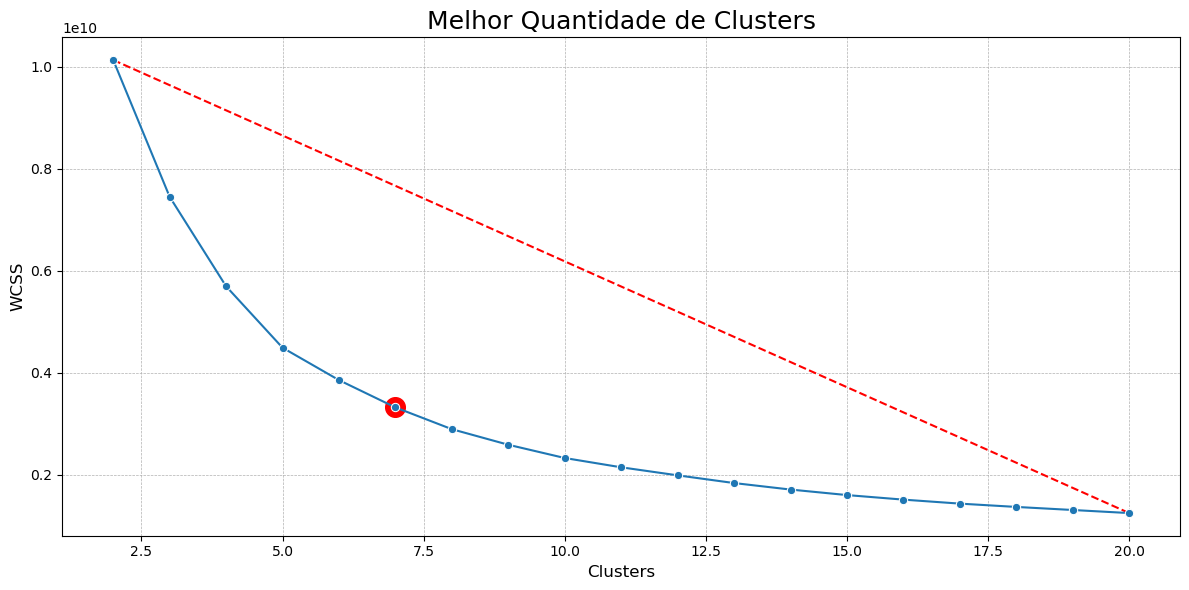

In [53]:
iterations = list(range(2,21))

# Plot performances
plt.figure(figsize=(12, 6))
plt.plot([iterations[0], iterations[-1]], [wcss_scores[0], wcss_scores[-1]], color='red', linestyle='--') # Linha vermelha
sns.lineplot(x=iterations, y=wcss_scores, marker='o') # Linha + markers azul

# Marcar um ponto em vermelho no 7° clusters
plt.scatter(7, wcss_scores[5] # 5 porque começa em 2 clusters
            , color='red', marker='o', s=200)

plt.title('Melhor Quantidade de Clusters', fontsize=18)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


Usaremos o 7 clusters, pois ele é o ponto mais distante da linha. Sendo considerado o equilibrio entre maior homogeneidade dentro do cluster e a maior diferença entre clusters.

---

### Analisando os Clusters

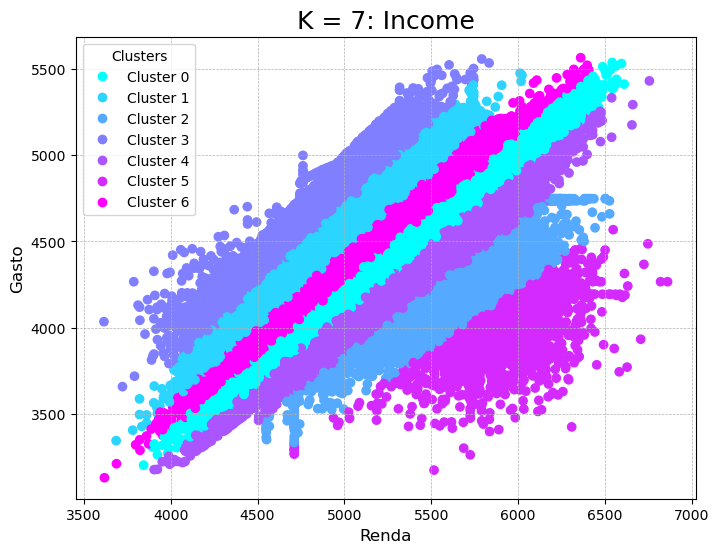

In [54]:
X_norm = Normalizer().fit_transform(X)

SEED = 2131
np.random.seed(SEED)

model = KMeans(n_clusters=7, n_init=10, random_state=SEED) 
labels = model.fit_predict(X_norm)   # Dados Normalizados

plt.figure(figsize=(8, 6))
plt.title('K = 7: Income', fontsize=18)
plt.xlabel('Renda', fontsize=12)
plt.ylabel('Gasto', fontsize=12)

# Scatter plot
scatter_plot = plt.scatter(x='renda', y='compra', c=labels, cmap='cool', data=X)

# Legenda
unique_vals = np.unique(labels)
legend_labels = [f'Cluster {val}' for val in unique_vals]
handles, _ = scatter_plot.legend_elements()

plt.legend(handles=handles, title = 'Clusters',labels=legend_labels, loc=2)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()


Os clusters com os dados normalizados não são bons, porque se tornaram lineares

---

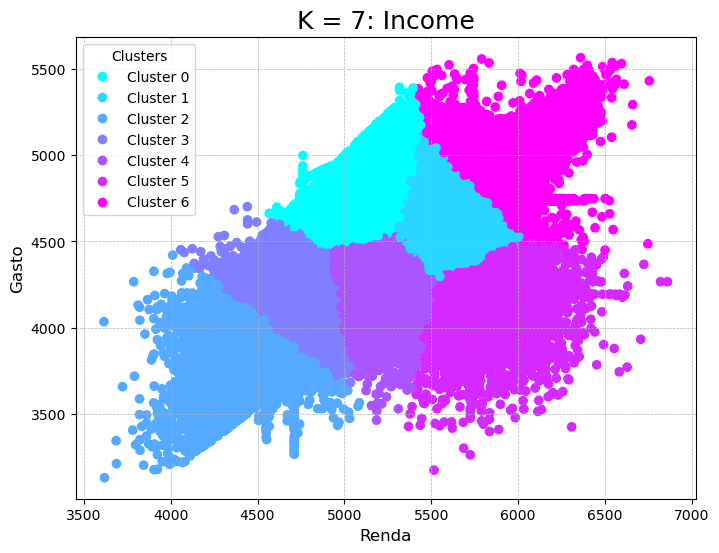

In [55]:
SEED = 2131
np.random.seed(SEED)

model = KMeans(n_clusters=7, n_init=10, random_state=SEED)
labels = model.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.title('K = 7: Income', fontsize=18)
plt.xlabel('Renda', fontsize=12)
plt.ylabel('Gasto', fontsize=12)

# Scatter plot
scatter_plot = plt.scatter(x='renda', y='compra', c=labels, cmap='cool', data=X)

# Legenda
unique_vals = np.unique(labels)
legend_labels = [f'Cluster {val}' for val in unique_vals]
handles, _ = scatter_plot.legend_elements()

plt.legend(handles=handles, title = 'Clusters',labels=legend_labels, loc=2)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

<h3>Clusters Gerados</h3>
<p>Cluster 0 -> Renda média baixa e gasto alto médio</p>
<p>Cluster 1 -> Renda média alta e gasto alto médio</p>
<p>Cluster 2 -> Renda baixa e gasto baixo</p>
<p>Cluster 3 -> Renda baixa e gasto médio</p>
<p>Cluster 4 -> Renda média e gasto baixo</p>
<p>Cluster 5 -> Renda alta e gasto baixo</p>
<p>Cluster 6 -> Renda alta e gasto alto</p>

<h3>Analise</h3>
<p>Por mas que 7 nucleos seja o equilibrio entre compactação dos cluster e diferença entre eles. Para o nosso problema, está sobrando um cluster que não ajuda muito, o cluster 0 e 1. Eles tem quase as mesmas caracteristicas, e por isso será reduzido um cluster do modelo.</p>

---

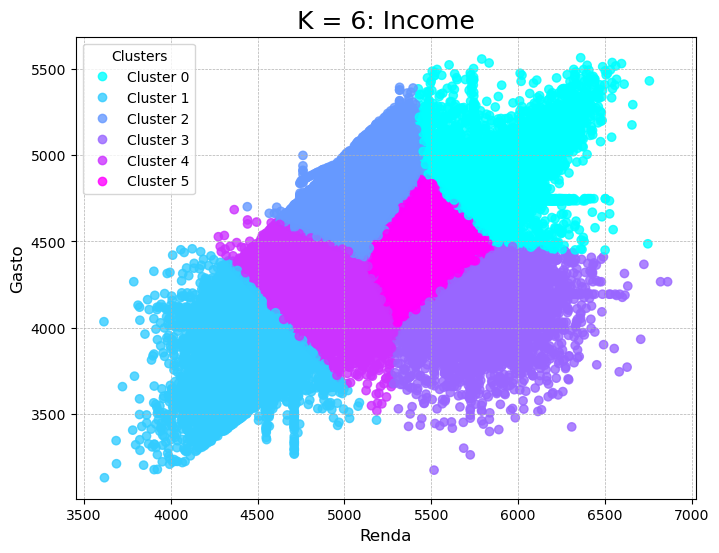

In [56]:
SEED = 2131
np.random.seed(SEED)

model = KMeans(n_clusters=6, n_init=10, random_state=SEED)
labels = model.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.title('K = 6: Income', fontsize=18)
plt.xlabel('Renda', fontsize=12)
plt.ylabel('Gasto', fontsize=12)

# Scatter plot
scatter_plot = plt.scatter(x='renda', y='compra', c=labels, cmap='cool', data=X, alpha=0.8)

# Legenda
unique_vals = np.unique(labels)
legend_labels = [f'Cluster {val}' for val in unique_vals]
handles, _ = scatter_plot.legend_elements()

plt.legend(handles=handles, title = 'Clusters',labels=legend_labels, loc=2)

plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

<h3>Clusters Gerados</h3>
<p>Cluster 0 -> Renda alta e gasto alto</p>
<p>Cluster 1 -> Renda baixa e gasto baixo</p>
<p>Cluster 2 -> Renda média e gasto alto</p>
<p>Cluster 3 -> Renda alta e gasto baixo</p>
<p>Cluster 4 -> Renda baixo/média e gasto baixo/médio </p>
<p>Cluster 5 -> Renda média e gasto médio</p>

<h3>Analise</h3>
<p>Com 6 cluster conseguimos bons agrupamentos e bem definidos.</p>

---

<h3>Metrica</h3>
<h4>Silhueta Score</h4>
<p>Varia de -1 a 1, avalia o nivel de compactação dentro de um cluster, sendo 1 extremamente compactado.

In [57]:
labels = model.labels_
silhouette = silhouette_score(X, labels, metric = 'euclidean')
print(f'{silhouette:.4f}')

0.3634


Temos uma compactação dos dados nos clusters

## DBSCAN

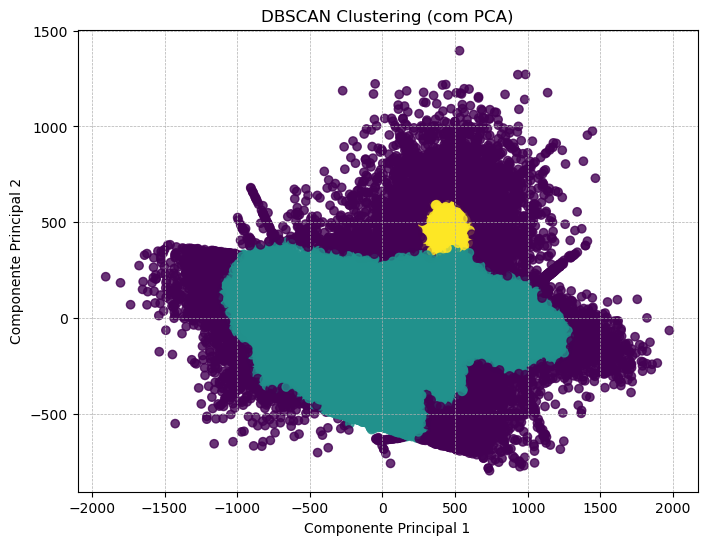

In [58]:
# Redução de dimensionalidade usando PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Dicionário de parâmetros
params = {
    'min_samples': 400,
    'eps': 80,
}

# Gerando o modelo
model = DBSCAN(**params) 

# Armazenando as predições
labels = model.fit_predict(X_reduced)

# Configurações do gráfico
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', alpha=0.8)  # Usando cmap='viridis' para mapear cores
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('DBSCAN Clustering (com PCA)')
plt.grid(True, linestyle='--', linewidth=0.5)  # Adiciona grade ao gráfico
plt.show()


Os clusters do DBSCAN não são bem definidos e nem estão agrupados por caracteristicas distintas. Já que há um grupo maior que engloba os outros grupos.

---

<h3>Metrica</h3>
<h4>Silhueta Score</h4>
<p>Varia de -1 a 1, avalia o nivel de compactação dentro de um cluster, sendo 1 extremamente compactado.

In [59]:
labels = model.labels_
silhouette = silhouette_score(X, labels, metric = 'euclidean')
print(f'{silhouette:.4f}')

0.0692


temos uma compactação razoável 

# Conclusão

O modelo que gerou os melhores clusters para esse projeto foi o modelo K-Means. Já que ele gerou clusters com agrupamento de caracteristicas distintas e bem definidas que fazem sentido para o nosso negocio.